# CFD -- 2D Advection-Diffusion Equation
## Kelsey Malloy

### <i>last edited: 09/2020</i>

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt

### Functions

In [20]:
def func(X):
    return np.sqrt((1-4*x**2)**2+(1-4*y**2)**2)

In [37]:
def fd(u,dx,order):
    # assume periodicity
    
    ux = np.zeros(u.shape)
    
    if order == 1: # FORWARD EULER
        ux[:-1,:-1] = (u[1:,1:] - u[:-1,:-1])/dx
        
        ux[:,-1] = ux[:,0] # periodic
        ux[-1,:] = ux[0,:] 
    
    elif order == -1: # BACKWARD EULER
        ux[1:,1:] = (u[1:,1:] - u[:-1,:-1])/dx
        
        ux[0,:] = ux[-1,:] # periodic
        ux[:,0] = ux[:,-1]
        
#     elif order == 2: # CENTERED DIFF, 2nd order
#         ux[1:-1] = (u[2:]-u[:-2]) / (2*dx)       
#         ux[0] = (u[1]-u[-2]) / (2*dx) 
#         ux[-1] = (u[1]-u[-2]) / (2*dx)
        
    return ux

In [38]:
def rhsadv(u,c,dx,order):
    ux = fd(u,dx,order) # compute deriv
    r = -c*ux
    return r

In [39]:
def rk1(u,c,diffusion,dx,order,dt):
    r=rhsadv(u,c,dx,order)
    u = u + dt*r
    return u

In [40]:
def rk3(u,xpts,dx,mu,periodic):
    
    u[1:] = u[1:] - mu*(u[1:]-u[0:-1])
    if periodic==1:
        u[0] = u[0] - mu*(u[0]-u[-1])
    #return u

In [44]:
def plotfig(X,Y,u):
    fig = plt.figure(1,figsize=[16,8])
    ax1 = fig.add_subplot(121)
    ax1.set_title('Advection Equation Solution')
    ax1.set_xlim([-1,1])
    ax1.set_ylim([-1,1])
    ax1.contourf(X,Y,u,40)
    #ax1.legend(loc=1)

In [33]:
def gauss(X,Y,nx,ny):
    rad=0.1
    return 1*(np.exp(-((X-nx/2)**2/(2*(rad)**2) + (Y-ny/2)**2/(2*(rad)**2))))

### Define the grid

In [26]:
xmin,xmax=-1,1
ymin,ymax=-1,1
nx,ny=64,64
dx,dy=(xmax-xmin)/nx,(ymax-ymin)/nx  # grid spacing
xpts,ypts = np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny) # cell edges excluding halos
print(dx,dy)

X,Y = np.meshgrid(xpts,ypts)
print(Y)

0.03125 0.03125
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.96825397 -0.96825397 -0.96825397 ... -0.96825397 -0.96825397
  -0.96825397]
 [-0.93650794 -0.93650794 -0.93650794 ... -0.93650794 -0.93650794
  -0.93650794]
 ...
 [ 0.93650794  0.93650794  0.93650794 ...  0.93650794  0.93650794
   0.93650794]
 [ 0.96825397  0.96825397  0.96825397 ...  0.96825397  0.96825397
   0.96825397]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


### Define the integratation time & number of steps

In [104]:
mu = 0.5
c = 10.
diffusion = 0.
dt = mu*dx/c
print(dt)
nt = (xmax-xmin)/c/dt
print(nt)
order = -1

0.0015625
128.0


### Time-stepping

initial conditions

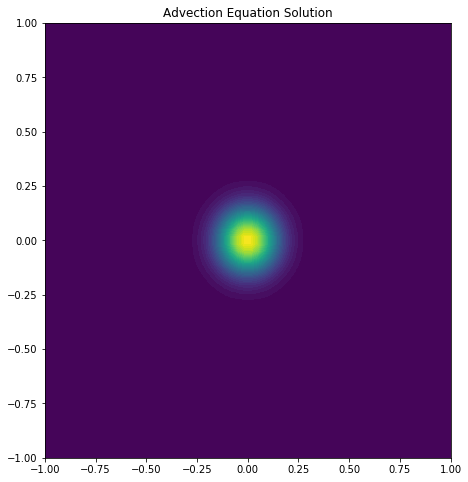

In [125]:
u = gauss(X,Y,0,0)
plotfig(X,Y,u)

time updates

/Users/newumuser/anaconda3/envs/mainenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


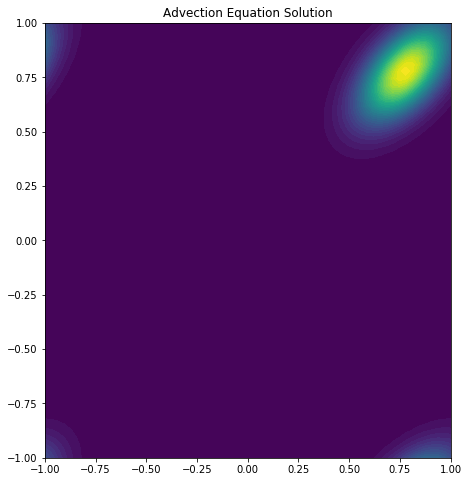

In [126]:
for t in range(1,50):
    u = rk1(u,c,diffusion,dx,order,dt)
    plotfig(X,Y,u)